# Statistical Machine Learning AM41ML

## Week 3 Classification, K-means Algorithm

# The objective of this first lab is to adjust a curve to a set of data by selecting the appropriate model complexity, and avoiding overfiting.

## Task 1 a
Construct your own artificial dataset. The data to be consider has the following form:
$$
y_n=g(x_n)+\varepsilon_n,
$$
where $x_n$ is the independent variable or feature, $y_n$ is the dependent variable, target or label, $\varepsilon$ represents the added noise to the model (that has been drawn from a Normal Distribution with zero mean and $\sigma^2$ variance) and $g(\cdot)$ is the true generating function.

Construct a data set formed by $N=11$ ordered pairs $(x_n,y_n)$, where $x_n=\frac{n}{10},$ for all $n=0,1,\dots,10$, $g(x)=x+1.5 \sin(2\pi x)$ and $\varepsilon\sim\mathcal{N}(\varepsilon|0,0.04)$, i.e. a Gaussian deviate with zero mean and 0.04 variance.

Hint: Use the library NumPy https://numpy.org/

## Task 1 b

Make a plot y vs x of the data set

Hint: Use the library PyPlot https://matplotlib.org/


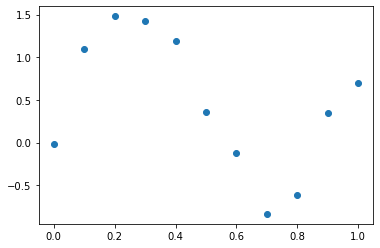

In [ ]:
################
### Task 1 a ###
################

import numpy as np                        # Imports NumPy
def data(eps):                            # Function data(eps) constructs a data set with the adition of a Gaussian noise with std eps
    ee = np.random.normal(0, eps, 11)     # Noise array
    x  = np.arange(0,1.01,.1)             # Independent variable array
    y  = x + 1.5 * np.sin(2*np.pi*x) + ee # Dependent variable y = g(x) + Gaussian noise array
    return(x,y)                           # The function returns two arrays of dim 11. Independent and dependent variables respectively

x1 , y1 = data(0.2)                       # A data set must be created and kept in order to compute the polynomials

################
### Task 1 b ###
################

import matplotlib.pyplot as plt           # Imports PyPlot          
plt.scatter(x1,y1)                        # Simplest possible scatter points plot y vs x (Feel free to improve this plot)
plt.show()                                # Show


## Task 2 a
Compute the best fit polynomial of order $L=1,\,2,\,\dots,12$, that minimizes the sum-of-square error for your artificial dataset.
## Task 2 b
Plot each one of the polynomials and the data points in the same plot.

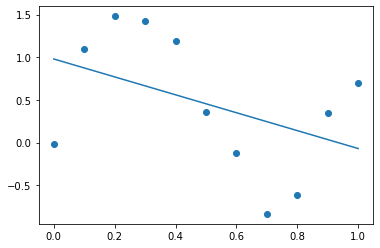

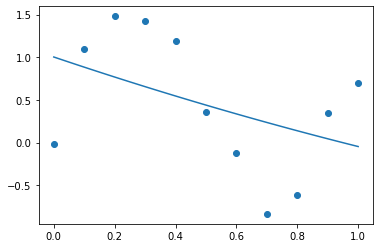

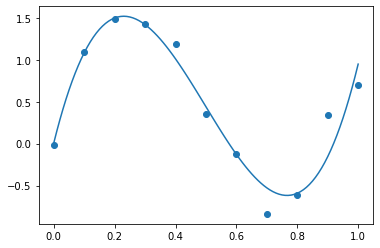

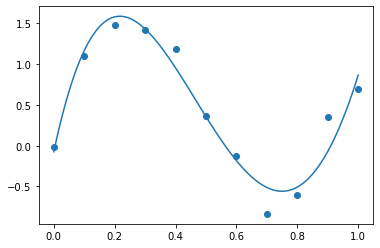

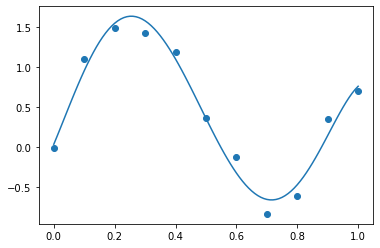

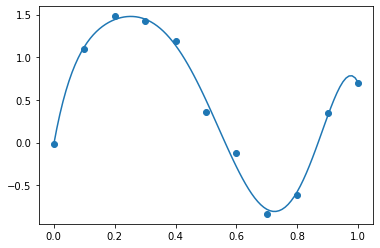

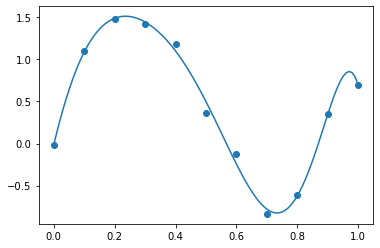

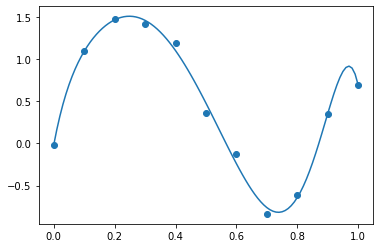

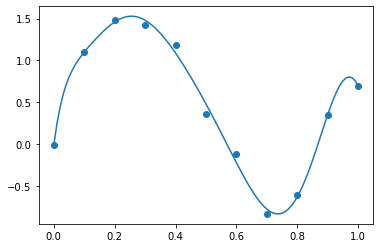

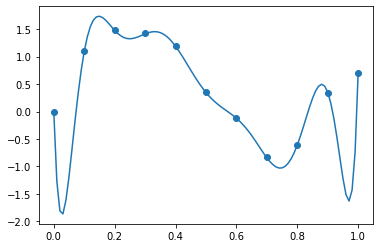

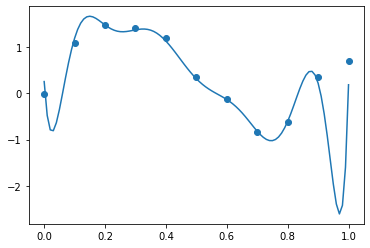

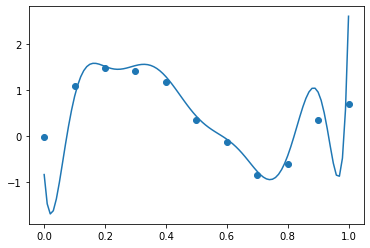

In [ ]:
################
### Task 2 a ###
################

def bfpC(L):                                                 # Function bfpc(L) construct the least-square polynomial of O(L) given the data set {x1,y1}
    
    tt   = np.zeros(L + 1)                                   # Definition of the array tt with averages yx^i
    AA   = np.zeros((L + 1,L + 1))                           # Definition of the matrix AA with averages x^i
    
    for i in range(0,L + 1):                                 # Loop in rows
        for j in range(i,L + 1):                             # Loop in columns
            for n in range(0,11):                            # Loop in data elements to compute the averages
                AA[i][j] = AA[i][j] + x1[n] ** (i + j) / 11  # Averages
            AA[j][i] = AA[i][j]                              # The matrix is symmetric therefore only half of the elements are computed
    
    for i in range(0,L + 1):                                 # Loop in rows
        for n in range(0,11):                                # Loop in data elements
            tt[i] = tt[i] + y1[n] * x1[n] ** i / 11          # Averages
            
    AI = np.linalg.inv(AA)                                   # Computation of the inverse matrix
    coef = AI.dot(tt)                                        # Computation of the solution A^(-1) t
    return(coef)                                             # Returns an array with the coeficients of the polynomial of order L

C01 = bfpC(1)                                                # Coeficients for the polynomial of order 1
C02 = bfpC(2)                                                # Coeficients for the polynomial of order 2
C03 = bfpC(3)                                                # Coeficients for the polynomial of order 3
C04 = bfpC(4)                                                # Coeficients for the polynomial of order 4
C05 = bfpC(5)                                                # Coeficients for the polynomial of order 5
C06 = bfpC(6)                                                # Coeficients for the polynomial of order 6
C07 = bfpC(7)                                                # Coeficients for the polynomial of order 7
C08 = bfpC(8)                                                # Coeficients for the polynomial of order 8
C09 = bfpC(9)                                                # Coeficients for the polynomial of order 9
C10 = bfpC(10)                                               # Coeficients for the polynomial of order 10
C11 = bfpC(11)                                               # Coeficients for the polynomial of order 11
C12 = bfpC(12)                                               # Coeficients for the polynomial of order 12

################
### Task 2 b ###
################

def bfpP(coef,x):                                            # Function bfpP(coef,x) computes P(x)=coef(0)+coef(1)*x+...+coef(L)*x**L
    z = 0                                                    # z stores the evaluation of the polynomial
    l = 0                                                    # l is the order of the term
    for c in coef:                                           # Loop in coeficients
        z = z + c * x ** l                                   # Computation of the terms of the polynomial
        l = l + 1                                            # Increment in the order of the terms
    return(z)                                                # Returns the evaluation of the polynomial at x

X   = np.arange(0,1.01,.01)                                  # Suitable abscisas for the plots
Y01 = bfpP(C01,X)                                            # Array with the values of the polynomial of order 1
Y02 = bfpP(C02,X)                                            # Array with the values of the polynomial of order 2
Y03 = bfpP(C03,X)                                            # Array with the values of the polynomial of order 3
Y04 = bfpP(C04,X)                                            # Array with the values of the polynomial of order 4
Y05 = bfpP(C05,X)                                            # Array with the values of the polynomial of order 5
Y06 = bfpP(C06,X)                                            # Array with the values of the polynomial of order 6
Y07 = bfpP(C07,X)                                            # Array with the values of the polynomial of order 7
Y08 = bfpP(C08,X)                                            # Array with the values of the polynomial of order 8
Y09 = bfpP(C09,X)                                            # Array with the values of the polynomial of order 9
Y10 = bfpP(C10,X)                                            # Array with the values of the polynomial of order 10
Y11 = bfpP(C11,X)                                            # Array with the values of the polynomial of order 11
Y12 = bfpP(C12,X)                                            # Array with the values of the polynomial of order 12

plt.scatter(x1,y1)                                           # Scattered points and polynomial of order 1
plt.plot(X,Y01)
plt.show()
plt.scatter(x1,y1)                                           # Scattered points and polynomial of order 2   
plt.plot(X,Y02)
plt.show()
plt.scatter(x1,y1)                                           # Scattered points and polynomial of order 3   
plt.plot(X,Y03)
plt.show()
plt.scatter(x1,y1)                                           # Scattered points and polynomial of order 4   
plt.plot(X,Y04)
plt.show()
plt.scatter(x1,y1)                                           # Scattered points and polynomial of order 5   
plt.plot(X,Y05)
plt.show()
plt.scatter(x1,y1)                                           # Scattered points and polynomial of order 6   
plt.plot(X,Y06)
plt.show()
plt.scatter(x1,y1)                                           # Scattered points and polynomial of order 7   
plt.plot(X,Y07)
plt.show()
plt.scatter(x1,y1)                                           # Scattered points and polynomial of order 8   
plt.plot(X,Y08)
plt.show()
plt.scatter(x1,y1)                                           # Scattered points and polynomial of order 9   
plt.plot(X,Y09)
plt.show()
plt.scatter(x1,y1)                                           # Scattered points and polynomial of order 10   
plt.plot(X,Y10)
plt.show()
plt.scatter(x1,y1)                                           # Scattered points and polynomial of order 11  
plt.plot(X,Y11)
plt.show()
plt.scatter(x1,y1)                                           # Scattered points and polynomial of order 12   
plt.plot(X,Y12)
plt.show()


## Task 3 a: Training error
Given a polynomial of order $L$, $P_L(x)=c_0+c_1 x+\dots+c_n x^n$, compute the training error $E_T=\frac{1}{N}\sum_{j=1}^N\left(y_j-P_L(x_j)\right)^2$. Make a scatter plot of the training error against the order of the polynomial.

## Task 3 b: Validation
To validate your results generate 1000 data sets statisticaly identical to the one you have generated in Task 1. Separate the sets in 10 groups of 100 sets each. Compute the validating error, $E_V=\frac{1}{N}\sum_{j=1}^N\left(y_j-P_L(x_j)\right)^2$ where the data points $(x_j,y_j)$ belong to one of the new sets you have just created and the polynomial is one of the polynomials you constructed during Task 2. For each group compute the average error and its standard deviation. Finally compute the average and standard deviation of the error accross groups. Plot the average validation error and its standard deviation against the order of the polynomial. 

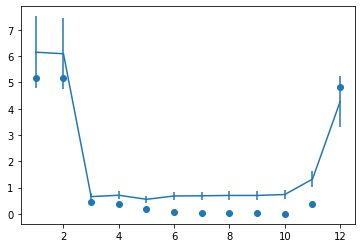

In [6]:
################
### Task 3 a ###
################

def TE(coef):                                # Function TE(vec) computs the training error of a polynomial with coeficients in vec
    n = 0                                    # Order of the term
    e = 0                                    # Error
    for x in x1:                             # Loop in datapoints
        e = e + (y1[n] - bfpP(coef,x)) ** 2  # Increment in Error
        n = n + 1                            # Increment in order
    return(e)                                # Returns the training error

nx     = np.arange(1,12.1,1)                 # Suitable abscisas for the plot
et     = np.zeros(12)                        # Creates the array to store the errors
et[0]  = TE(C01)                             # TE for Pol. of order 1
et[1]  = TE(C02)                             # TE for Pol. of order 2
et[2]  = TE(C03)                             # TE for Pol. of order 3
et[3]  = TE(C04)                             # TE for Pol. of order 4
et[4]  = TE(C05)                             # TE for Pol. of order 5
et[5]  = TE(C06)                             # TE for Pol. of order 6
et[6]  = TE(C07)                             # TE for Pol. of order 7
et[7]  = TE(C08)                             # TE for Pol. of order 8
et[8]  = TE(C09)                             # TE for Pol. of order 9
et[9]  = TE(C10)                             # TE for Pol. of order 10
et[10] = TE(C11)                             # TE for Pol. of order 11
et[11] = TE(C12)                             # TE for Pol. of order 12

plt.scatter(nx,et)                           # Scattered plot of the error

################
### Task 3 b ###
################

def sos(coef):                                   # Function similar to TE, computes an error but it creates a new data set each time
    n = 0
    e = 0
    xm , ym = data(0.2)                          # Constructs the data set to be compare to the polynomial stored in coef
    for x in xm:
        e = e + (ym[n] - bfpP(coef,x)) ** 2
        n = n + 1
    return(e)                                    # Returns the error

def stat0(coef,N):                               # Function stat0(coef,N) computes the average of the error associated to a group of size N
    med = 0                                      # Average
    for i in range(1,N):                         # Loop in the elements of the group
        xx  = sos(coef)                          # Error associated to one element in the group
        med = med + xx                           # Increment of the average
    med = med / N                                # Computation of the average
    return(med)                                  # Returns average of a group

def stat1(coef,N1,N2):                           # Function stat1(coef,N1,N2) computes the average error and variance in tandem with stat0
    med = 0                                      # Average of averages in groups
    var = 0                                      # Variance over variances on groups
    for i in range(1,N2):                        # Loop in group of groups
        xm  = stat0(coef,N1)                     # Computation of the average inside a group of size N1
        med = med + xm                           # Increment of the average
        var = var + xm ** 2                      # Increment of the second moment
    med = med / N2                               # Computation of the average
    var = np.abs(var / N2 - med ** 2) / (N2 - 1) # Computation of the experimental variance accross groups
    return(med,2 * np.sqrt(var))                 # Returns average and standard deviation

ev     = np.zeros(12)                            # Creates the array to store the errors
sd     = np.zeros(12)                            # Creates the array to store the standard deviations

ev[0]  , sd [0]  = stat1(C01,100,10)            # Computes the validation error for the pol. order 1
ev[1]  , sd [1]  = stat1(C02,100,10)            # Computes the validation error for the pol. order 2
ev[2]  , sd [2]  = stat1(C03,100,10)            # Computes the validation error for the pol. order 3
ev[3]  , sd [3]  = stat1(C04,100,10)            # Computes the validation error for the pol. order 4
ev[4]  , sd [4]  = stat1(C05,100,10)            # Computes the validation error for the pol. order 5
ev[5]  , sd [5]  = stat1(C06,100,10)            # Computes the validation error for the pol. order 6
ev[6]  , sd [6]  = stat1(C07,100,10)            # Computes the validation error for the pol. order 7
ev[7]  , sd [7]  = stat1(C08,100,10)            # Computes the validation error for the pol. order 8
ev[8]  , sd [8]  = stat1(C09,100,10)            # Computes the validation error for the pol. order 9
ev[9]  , sd [9]  = stat1(C10,100,10)            # Computes the validation error for the pol. order 10
ev[10] , sd [10] = stat1(C11,100,10)            # Computes the validation error for the pol. order 11
ev[11] , sd [11] = stat1(C12,100,10)            # Computes the validation error for the pol. order 12

plt.errorbar(nx,ev,sd)
plt.show()